In [15]:
import graphlab

In [16]:
sales = graphlab.SFrame('/Users/Sajjad/Downloads/pcrate.csv')

Finished parsing file /Users/Sajjad/Downloads/pcrate.csv

Parsing completed. Parsed 99 lines in 0.030403 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Sajjad/Downloads/pcrate.csv

Parsing completed. Parsed 99 lines in 0.018643 secs.

In [17]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [18]:
len(sales)

99

In [19]:
graphlab.canvas.set_target('ipynb')

In [20]:
sales.show(view = 'Scatter Plot', x = 'CrimeRate', y = 'HousePrice')

In [21]:
crime_model = graphlab.linear_regression.create(sales,
                                                target='HousePrice',
                                               features = ['CrimeRate'],
                                               validation_set = None,
                                               verbose = False)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

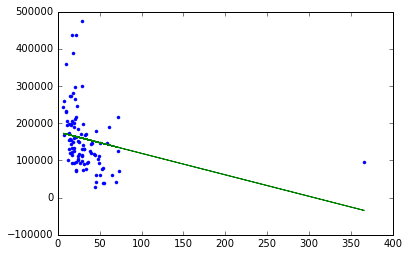

In [24]:
plt.plot(sales['CrimeRate'],sales['HousePrice'], '.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [26]:
sales[sales['CrimeRate']>100]

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [27]:
sales_new = sales[sales['CrimeRate'] != 366.1]
sales_new.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [28]:
len(sales_new)

98

In [31]:
sales_new.show(view='Scatter Plot', x = 'CrimeRate', y = 'HousePrice')

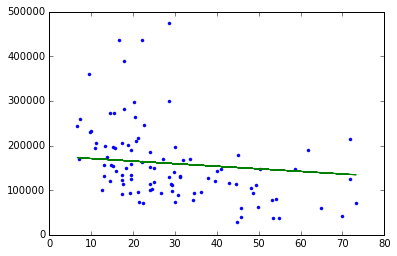

In [33]:
plt.plot(sales_new['CrimeRate'], sales_new['HousePrice'], '.',
        sales_new['CrimeRate'],crime_model.predict(sales_new), '-')

In [34]:
crime_model_new = graphlab.linear_regression.create(sales_new,
                                                   target = 'HousePrice',
                                                   features = ['CrimeRate'],
                                                   validation_set = None,
                                                   verbose = False)

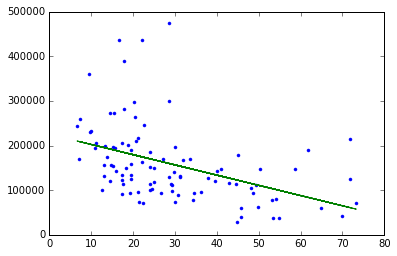

In [35]:
plt.plot(sales_new['CrimeRate'],sales_new['HousePrice'],'.',
        sales_new['CrimeRate'],crime_model_new.predict(sales_new),'-')

In [39]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [40]:
crime_model_new.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [44]:
noHigh = sales_new[sales_new['HousePrice']<350000]

In [45]:
crime_model_noHigh = graphlab.linear_regression.create(noHigh,
                                                      target = 'HousePrice',
                                                      features = ['CrimeRate'],
                                                      validation_set = None,
                                                      verbose = False)

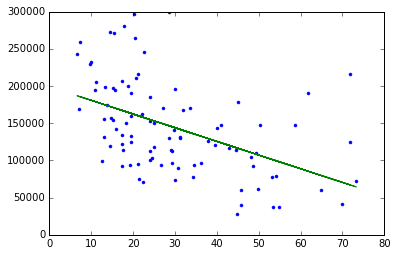

In [46]:
plt.plot(noHigh['CrimeRate'],noHigh['HousePrice'], '.',
        noHigh['CrimeRate'], crime_model_noHigh.predict(noHigh),'-')

In [47]:
crime_model_noHigh.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333
